In [1]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

In [2]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [3]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [4]:
from scipy.io import wavfile

path  = "음성 자료 경로"
fname = "음성 파일명.wav"
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [5]:
IPython.display.Audio(data=data, rate=rate)

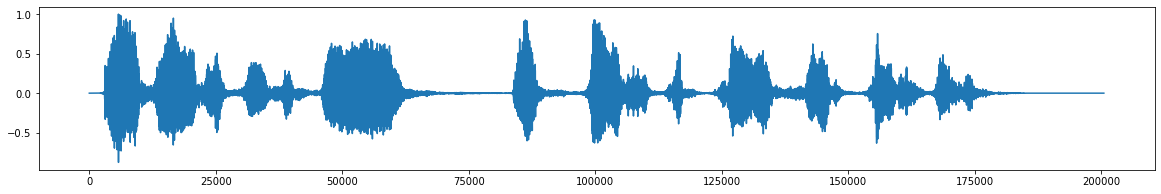

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [7]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

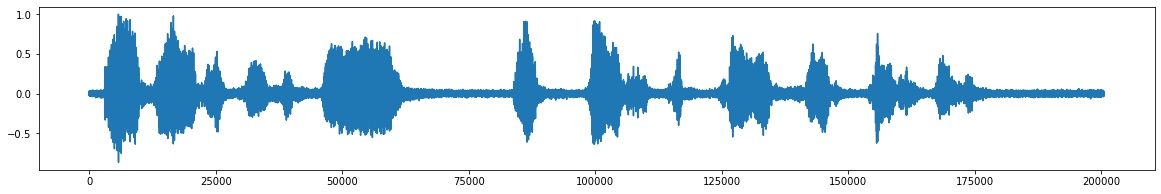

In [8]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [11]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

In [12]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

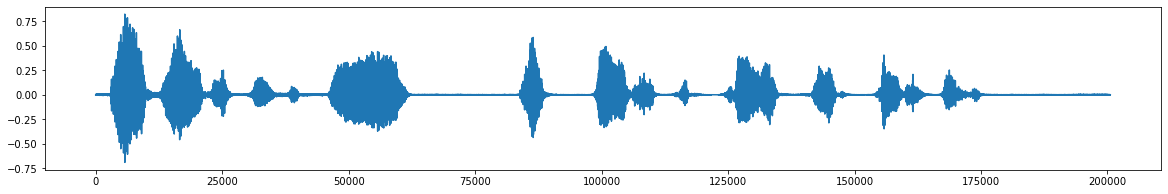

In [13]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [17]:
import librosa
mfcc = librosa.feature.mfcc(reduced_noise, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)

In [19]:
import sklearn
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

In [20]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = pad2d(mfcc, 40)

AttributeError: module 'librosa' has no attribute 'display'